# 📊 Project 2 — Bank Marketing Classification
*Portuguese Banking Institution*

## Summary

This notebook follows the CRISP-DM methodology to analyze and model the **Bank Marketing Dataset**.  
It is organized into the following phases:

1. **Business Understanding** – Define project objectives and success criteria.  
2. **Data Understanding** – Explore dataset structure, distributions, and quality.  
3. **Data Preparation** – Clean and transform data for modeling.  
4. **Modeling** – Build and compare classification models.  
5. **Evaluation** – Assess results against business objectives.  
6. **Deployment** – Outline how the model could be used in practice.  

Use the outline sidebar in VS Code to quickly navigate or collapse sections.
---




## Phase 1 — Business Understanding

### Business Objective
The bank runs large-scale telemarketing campaigns to promote term deposits. These campaigns are expensive, requiring significant staff time and customer contact.  

The goal is to **improve the efficiency of marketing campaigns** by identifying which clients are most likely to subscribe to a term deposit.  

If successful:
- Fewer wasted calls and resources
- Higher conversion rates
- Improved customer satisfaction by reducing unwanted contact

---

### Data Science Objective
Translate the business need into a technical task:  

- Build a **binary classification model** that predicts whether a client will subscribe (`y = yes`) or not (`y = no`).  
- Compare at least two baseline models (Logistic Regression and Random Forest).  
- Optimize performance through hyperparameter tuning and imbalance handling.  
- Provide insights into which features (e.g., age, job, previous campaign outcome, economic indicators) influence the outcome most.  


### Success Criteria / KPIs
The project will be considered successful if the model:  
- Achieves meaningful lift over a naive baseline (predicting "no" for all clients).  
- Shows improved **Precision, Recall, F1-score, and ROC-AUC**, not just Accuracy.  
- Provides interpretable insights that stakeholders can act on.  

*Example*: A target Precision of >0.30 and Recall >0.40 for the positive class ("yes"), with ROC-AUC above 0.70.


### Stakeholders & Constraints
**Stakeholders:**
- Bank Marketing Department (campaign planners, analysts)
- Call center staff (implementing the campaigns)
- Bank executives (strategic planning and ROI evaluation)

**Constraints:**
- Time: project due in 2 weeks (student scope)
- Budget: limited compute, must use free/open-source tools (scikit-learn, imbalanced-learn)
- Data: fixed dataset from UCI, no additional data collection
- Risk tolerance: avoid false positives that waste resources, but also avoid missing too many likely customers


### Project Plan
- **Phase 1**: Business Understanding (define goals, success criteria) ✅  
- **Phase 2**: Data Understanding (EDA, data profiling, class imbalance analysis)  
- **Phase 3**: Data Preparation (encoding, scaling, missing values, leakage prevention)  
- **Phase 4**: Modeling (Logistic Regression, Random Forest, tuning, resampling)  
- **Phase 5**: Evaluation (compare models, check KPIs, review process)  
- **Phase 6**: Deployment (recommend workflow for stakeholders, monitoring plan)  

*Tools*: Visual Studio Code, Python, pandas, seaborn, matplotlib, scikit-learn, imbalanced-learn  
*Risks*: Data imbalance, overfitting, data leakage (notably from `duration` feature)


### Core Imports (used throughout the project)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set default plotting style
sns.set_theme(style="whitegrid")


## Phase 2 — Data Understanding

### Dataset Selected
We will use **bank-additional-full.csv**, which contains **~41,188 rows** and **21 columns** (20 input features + 1 output label) (`y`).

This dataset is the enriched version of the UCI Bank Marketing dataset, including additional macroeconomic indicators (e.g., employment variation rate, consumer confidence index).  

**Citation**:  
[Moro et al., 2014] S. Moro, P. Cortez, and P. Rita. *A Data-Driven Approach to Predict the Success of Bank Telemarketing.* Decision Support Systems, 2014. DOI: [10.1016/j.dss.2014.03.001](http://dx.doi.org/10.1016/j.dss.2014.03.001)

---


### Dataset Dictionary — `bank-additional-full.csv`

#### 📂 Bank Client Data
- **age** (numeric): Client’s age  
- **job** (categorical): Type of job  
  *Values*: admin., blue-collar, entrepreneur, housemaid, management, retired, self-employed, services, student, technician, unemployed, unknown  
- **marital** (categorical): Marital status  
  *Values*: divorced, married, single, unknown  
- **education** (categorical): Education level  
  *Values*: basic.4y, basic.6y, basic.9y, high.school, illiterate, professional.course, university.degree, unknown  
- **default** (categorical): Has credit in default? (yes, no, unknown)  
- **housing** (categorical): Has housing loan? (yes, no, unknown)  
- **loan** (categorical): Has personal loan? (yes, no, unknown)  

---

#### ☎️ Last Contact Info
- **contact** (categorical): Contact type (cellular, telephone)  
- **month** (categorical): Last contact month (jan … dec)  
- **day_of_week** (categorical): Last contact day (mon … fri)  
- **duration** (numeric): Last contact duration (seconds)  
  ⚠️ *Note*: Highly predictive, but not realistic for modeling since it’s only known after the call. Usually excluded from training.  

---

#### 📊 Campaign Data
- **campaign** (numeric): Number of contacts during this campaign  
- **pdays** (numeric): Days since last contact from a previous campaign (999 = not previously contacted)  
- **previous** (numeric): Number of contacts before this campaign  
- **poutcome** (categorical): Outcome of previous campaign (failure, nonexistent, success)  

---

#### 🌍 Social & Economic Context
- **emp.var.rate** (numeric): Employment variation rate (quarterly)  
- **cons.price.idx** (numeric): Consumer price index (monthly)  
- **cons.conf.idx** (numeric): Consumer confidence index (monthly)  
- **euribor3m** (numeric): Euribor 3-month rate (daily)  
- **nr.employed** (numeric): Number of employees (quarterly)  

---

#### 🎯 Target Variable
- **y** (binary categorical): Has the client subscribed to a term deposit?  
  *Values*: yes, no


In [2]:
# Load dataset (update path if needed)
df = pd.read_csv("./data/bank-additional-full.csv", sep=";")

# Shape of the dataset (rows, columns)
df.shape

(41188, 21)

In [3]:
# Quick look, print first 5 rows
df.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
# Basic dataset info: lists each column, its data type, and non-null counts
df.info() 

# Summary statistics: lists each column with count, mean, std, min, 25%, 50%, 75%, max for numeric columns
df.describe(include="all").transpose().head(20)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,41188.0,NaN,NaN,NaN,40.02406,10.42125,17.0,32.0,38.0,47.0,98.0
job,41188,12,admin.,10422,NaN,NaN,NaN,NaN,NaN,NaN,NaN
marital,41188,4,married,24928,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education,41188,8,university.degree,12168,NaN,NaN,NaN,NaN,NaN,NaN,NaN
default,41188,3,no,32588,NaN,NaN,NaN,NaN,NaN,NaN,NaN
housing,41188,3,yes,21576,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan,41188,3,no,33950,NaN,NaN,NaN,NaN,NaN,NaN,NaN
contact,41188,2,cellular,26144,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,41188,10,may,13769,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day_of_week,41188,5,thu,8623,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Column Profiling (Summary)

| Column         | Type        |   NUnique |      Min |      Max |   % Missing/Unknown | Flags                   |
|:---------------|:------------|----------:|---------:|---------:|--------------------:|:------------------------|
| age            | Numeric     |        78 |   17     |   98     |                0    |                         |
| campaign       | Numeric     |        42 |    1     |   56     |                0    |                         |
| cons.conf.idx  | Numeric     |        26 |  -50.8   |  -26.9   |                0    |                         |
| cons.price.idx | Numeric     |        26 |   92.201 |   94.767 |                0    |                         |
| contact        | Categorical |         2 |  nan     |  nan     |                0    |                         |
| day_of_week    | Categorical |         5 |  nan     |  nan     |                0    |                         |
| default        | Categorical |         3 |  nan     |  nan     |               20.87 | ⚠️ High Missing/Unknown |
| duration       | Numeric     |      1544 |    0     | 4918     |                0    |                         |
| education      | Categorical |         8 |  nan     |  nan     |                4.2  |                         |
| emp.var.rate   | Numeric     |        10 |   -3.4   |    1.4   |                0    |                         |
| euribor3m      | Numeric     |       316 |    0.634 |    5.045 |                0    |                         |
| housing        | Categorical |         3 |  nan     |  nan     |                2.4  |                         |
| job            | Categorical |        12 |  nan     |  nan     |                0.8  |                         |
| loan           | Categorical |         3 |  nan     |  nan     |                2.4  |                         |
| marital        | Categorical |         4 |  nan     |  nan     |                0.19 |                         |
| month          | Categorical |        10 |  nan     |  nan     |                0    |                         |
| nr.employed    | Numeric     |        11 | 4963.6   | 5228.1   |                0    |                         |
| pdays          | Numeric     |        27 |    0     |  999     |                0    |                         |
| poutcome       | Categorical |         3 |  nan     |  nan     |                0    |                         |
| previous       | Numeric     |         8 |    0     |    7     |                0    | ⚠️ Low Variability      |
| y              | Categorical |         2 |  nan     |  nan     |                0    |                         |



In [ ]:
import importlib  # importlib is used to check if openpyxl is installed for Excel export
import warnings   # 'warnings' is used to issue a warning if openpyxl is not found

# Column profiling helper function
def profile_columns( df
                    ,target_col = "y"
                    ,include_target = True
                    ,missing_threshold = 10
                    ,styled = True
                    ,export = None
                    ,export_path = "bank_profile" ):
  
  """ 
  Profiles columns in the dataframe, summarizing type, unique values,
  min/max (numeric only), % missing/unknown, and flags potential issues.
  
  Parameters:
  - df: pandas DataFrame
  - target_col: name of target column (default = "y")
  - include_target: whether to include target column in output (default = False)
  - missing_threshold: % missing/unknown above which to flag a warning
  - styled: whether to return a styled DataFrame (default=True)
  - export: export format (None, "csv", or "excel")
  - export_path: base path (without extension) for export file
  """

  def simplify_dtype(dtype):
    return "Numeric" if pd.api.types.is_numeric_dtype(dtype) else "Categorical"
  
  # Optionally drop target column from profiling
  data = df.drop(columns = [target_col]) if not include_target and target_col in df.columns else df

  # Build profile DataFrame
  profile = pd.DataFrame({ "Type": data.dtypes.apply(simplify_dtype)
                          ,"NUnique": data.nunique()
                          ,"Min": data.min(numeric_only = True)
                          ,"Max": data.max(numeric_only = True)
                          ,"% Missing/Unknown": (data.isin(["unknown"]).sum() / len(data) * 100).round(2) })
  
  # Add flag column for potential issues
  flags = []
  #for col, row in profile.iterrows():
  for _, row in profile.iterrows():
    flag = ""

    # Flag high missing/unknown
    if row["% Missing/Unknown"] > missing_threshold:
      flag += "⚠️ High Missing/Unknown "

    # Flag Categorical with too many unique values
    if row["Type"] == "Categorical" and row["NUnique"] > 20:
      flag += "⚠️ High Cardinality "

    # Flag Numeric with too few unique values, only a few unique values (may be categorical instead)
    if row["Type"] == "Numeric" and row["NUnique"] < 10:
      flag += "⚠️ Low Variability "
    
    flags.append(flag.strip())

  profile["Flags"] = flags
  profile = profile.reset_index().rename(columns={"index": "Column"})

  # Optionally export profile to CSV or Excel
  if export == "csv":
    profile.to_csv(f"{export_path}", index = True)
  elif export == "excel":
    # Check if openpyxl is installed for Excel export
    if importlib.util.find_spec("openpyxl") is None:
      warnings.warn("Excel export requires 'openpyxl'. Please install it with `%pip install openpyxl`.", UserWarning)      
      #warning = Warning("openpyxl not found, cannot export to Excel. Please install openpyxl and try again.")
      #display(warning)
    else:
      profile.to_excel(f"{export_path}", index = True, sheet_name = "Column Profile")    

  # Optionally return styled DataFrame for better display in Jupyter
  if styled:
    # Compute 1-based column index of "Flags"
    flags_pos  = profile.columns.get_loc("Flags") + 1
    column_pos = profile.columns.get_loc("Type")  # Column names appear in index by default, but Type col is first real col
    #column_pos = profile.columns.get_loc("Column") + 1
    #print(f"Flags column position: {flags_pos}, Column position: {column_pos}")

    # Style: left-align the Flags column (header + cells), keep rows on one line
    styled_profile = ( 
      profile.style
             .set_properties(**{"white-space": "nowrap"})  # keep each row on one line
             .set_table_styles([ 
                # Left-align 'Flags' column (header + body)
                {"selector": f"thead th:nth-child({flags_pos+1})", "props": [("text-align", "center")]},
                {"selector": f"tbody td:nth-child({flags_pos+1})", "props": [("text-align", "left")]},
                                            
                # Left-align 'Column' column (header + body)
                {"selector": f"thead th:nth-child({column_pos+1})", "props": [("text-align", "center")]},
                {"selector": f"tbody td:nth-child({column_pos+1})", "props": [("text-align", "left")]}
              ], overwrite = False )
    )
    return styled_profile
  else:
    return profile

pd.set_option('display.max_columns', None)            # Show all columns in the profile output
pd.set_option('display.width', 1000)                  # Set display width for better readability
pd.set_option('display.colheader_justify', 'center')  # Center justify column headers

# Default (styled, no export) and/or explicitly setting styled = True
#profile = profile_columns(df)
#profile = profile_columns(df, styled = True)
#profile = profile_columns(df, styled = False)

# Rew DataFrame (not styled) and/or explicitly setting styled = False
#profile = profile_columns(df, styled = False)

# Export to CSV or Excel (not styled) and returns the raw DataFrame
#profile = profile_columns(df ,styled = False ,export = "csv"   ,export_path = "./data/bank_profile.csv")
#profile = profile_columns(df ,styled = False ,export = "excel" ,export_path = "./data/bank_profile.xlsx")

# Print profile as markdown table for better readability in VSCode
#raw_profile = profile_columns(df, styled = False)
#print(raw_profile.to_markdown(index = False))

# If you want to see the styled DataFrame in a Jupyter environment, uncomment the following line: 
profile = profile_columns(df, styled = True)
display(profile)


,Column,Type,NUnique,Min,Max,% Missing/Unknown,Flags
0,age,Numeric,78,17.000000,98.000000,0.000000,
1,campaign,Numeric,42,1.000000,56.000000,0.000000,
2,cons.conf.idx,Numeric,26,-50.800000,-26.900000,0.000000,
3,cons.price.idx,Numeric,26,92.201000,94.767000,0.000000,
4,contact,Categorical,2,nan,nan,0.000000,
5,day_of_week,Categorical,5,nan,nan,0.000000,
6,default,Categorical,3,nan,nan,20.870000,⚠️ High Missing/Unknown
7,duration,Numeric,1544,0.000000,4918.000000,0.000000,
8,education,Categorical,8,nan,nan,4.200000,
9,emp.var.rate,Numeric,10,-3.400000,1.400000,0.000000,


In [6]:
# Count 'unknown' entries (used in this dataset instead of NaN)
df.isin(["unknown"]).sum().sort_values(ascending=False).head(10)


default        8597
education      1731
housing         990
loan            990
job             330
marital          80
age               0
contact           0
month             0
day_of_week       0
dtype: int64

### Visuals for EDA

To better understand the dataset, we use visualizations that reveal key patterns and relationships.  
Each plot highlights a different aspect of the data:

1. **Histogram** → shows the distribution of a numeric feature.  
2. **Boxplot** → compares numeric features across categories.  
3. **Scatterplot** → explores relationships between two numeric variables.  
4. **Catplot** → compares categorical distributions against the target.  

These insights guide our cleaning and preparation decisions in Phase 3.


#### Histogram — Age Distribution

- **What**: Distribution of client ages.  
- **Why**: To see if certain age groups are overrepresented and if age skews toward specific ranges.  
- **Relevance**: Helps identify whether age should be scaled, bucketed, or left as-is during modeling.  


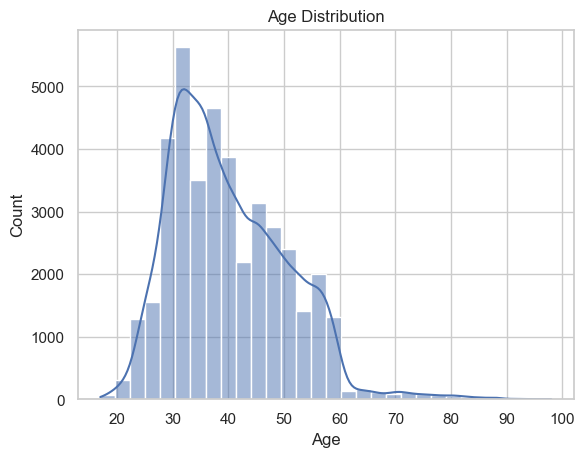

In [35]:
sns.histplot(df['age'], bins = 30, kde = True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


**Initial Age Observations:**  
Most clients are between **30–50 years old**, with fewer younger and older clients.  
This mid-life cluster suggests age may influence responsiveness, but additional analysis will be needed to confirm whether certain age groups are more likely to subscribe.


#### Boxplot — Campaign Contacts vs. Subscription Outcome

- **What**: Number of contacts during the campaign (`campaign`) split by subscription outcome (`y`).  
- **Why**: To examine whether clients who subscribed required more or fewer contact attempts.  
- **Relevance**: Identifies potential outliers in `campaign` (e.g., clients contacted 40+ times).  


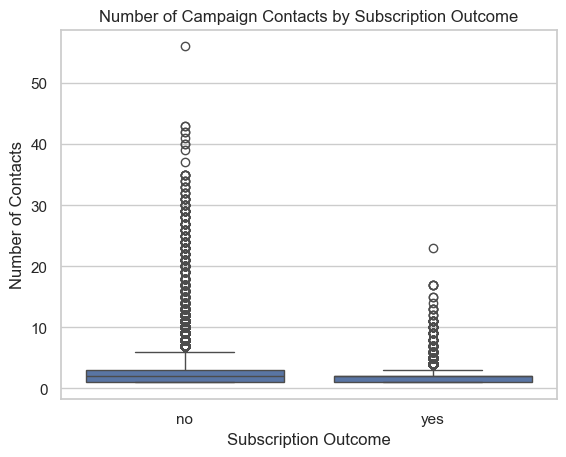

In [36]:
sns.boxplot(x = "y", y = "campaign", data = df)
plt.title("Number of Campaign Contacts by Subscription Outcome")
plt.xlabel("Subscription Outcome")
plt.ylabel("Number of Contacts")
plt.show()


**Initial Campaign Observations:**  
Clients who subscribed typically required **fewer contact attempts** than those who did not.  
This suggests diminishing returns from repeated contacts: multiple attempts without success may indicate lower likelihood of conversion.


#### Scatterplot — Age vs. Campaign Contacts

- **What**: Relationship between client age and number of contacts.  
- **Why**: To detect if certain age groups are contacted more frequently, and whether that relates to subscriptions.  
- **Relevance**: Helps assess if features interact and may hint at diminishing returns for repeated contacts.  


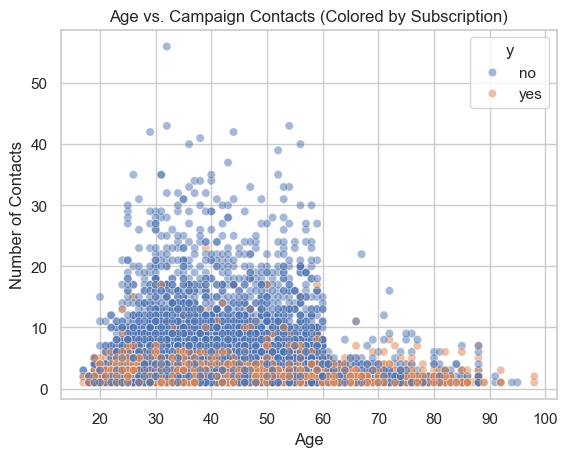

In [37]:
sns.scatterplot(x = "age", y = "campaign", hue = "y", data = df, alpha = 0.5)
plt.title("Age vs. Campaign Contacts (Colored by Subscription)")
plt.xlabel("Age")
plt.ylabel("Number of Contacts")
plt.show()


**Initial Interaction Observations (Age vs Campaign):**  
There is no clear linear relationship between age and number of contacts.  
However, younger and older clients show some clustering patterns, which may indicate different engagement strategies by campaign managers.  
This feature interaction may become more evident when modeled jointly with other variables.


#### Catplot — Job Type vs. Subscription Outcome

- **What**: Subscription outcomes (`y`) broken down by job type.  
- **Why**: To identify whether clients in certain occupations are more likely to subscribe.  
- **Relevance**: Supports feature importance later by showing categorical-job influence.  


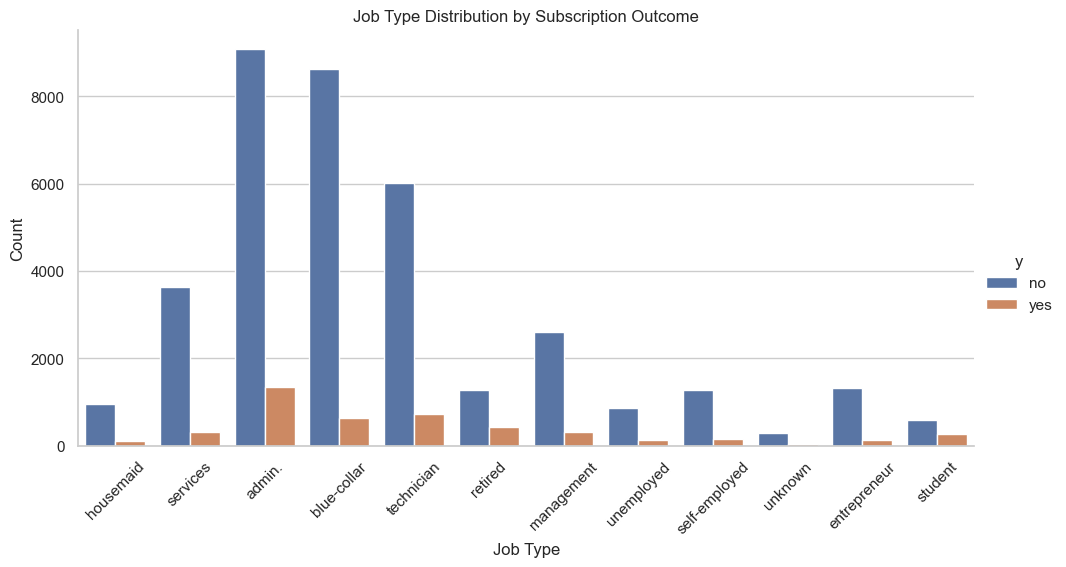

In [39]:
sns.catplot(x = "job", hue = "y", data = df, kind = "count", height = 5, aspect = 2)
plt.title("Job Type Distribution by Subscription Outcome")
plt.xticks(rotation = 45)
plt.xlabel("Job Type")
plt.ylabel("Count")
plt.show()


**Initial Job Observations:**  
Certain occupations (e.g., **students, retired, administrative**) show relatively higher subscription rates.  
In contrast, **blue-collar and services** jobs have lower conversion.  
This highlights job type as a potentially important predictor of subscription outcome.


#### Target Distribution (Imbalance)

- **What**: Shows the proportion of clients who subscribed (`yes`) vs. those who did not (`no`).  
- **Why**: Helps identify **class imbalance** in the dataset, which is critical for supervised learning tasks.  
- **Relevance**:  
  - If one class dominates (e.g., "no"), a naive model could appear accurate by always predicting the majority class.  
  - This imbalance will influence our evaluation strategy (Precision, Recall, F1, ROC-AUC) and may require class weights or resampling.


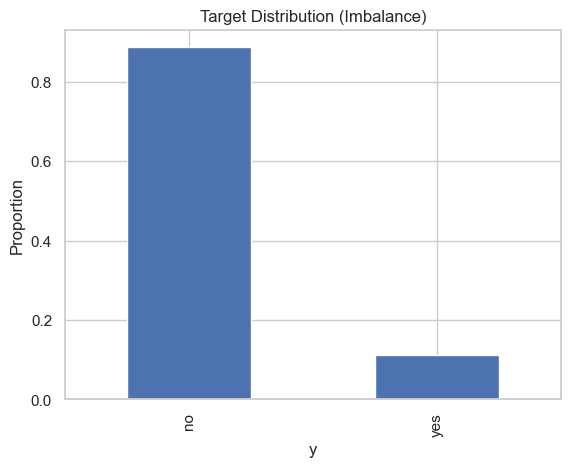

In [7]:
# Target distribution (yes/no)
df['y'].value_counts(normalize=True).plot(kind='bar', title='Target Distribution (Imbalance)')
plt.ylabel("Proportion")
plt.show()


**Initial Target Distribution Observation:**  
The dataset is highly imbalanced, with the majority of clients not subscribing.  
This means accuracy alone will be misleading — we must focus on metrics like Precision, Recall, F1, and ROC-AUC in later phases.


#### Countplots — Selected Categorical Features

- **What**: Show the frequency distribution of key categorical features (`job`, `marital`, `education`, `contact`).  
- **Why**: Helps visualize the balance or imbalance of categories within each feature, highlighting which groups dominate the dataset.  
- **Relevance**:  
  - **Job** → may reveal occupational groups overrepresented in the campaign.  
  - **Marital status** → may show whether relationship status influences targeting.  
  - **Education** → may highlight education levels tied to bank outreach or outcomes.  
  - **Contact type** → shows the marketing channel (cellular vs telephone), which could affect conversion rates.


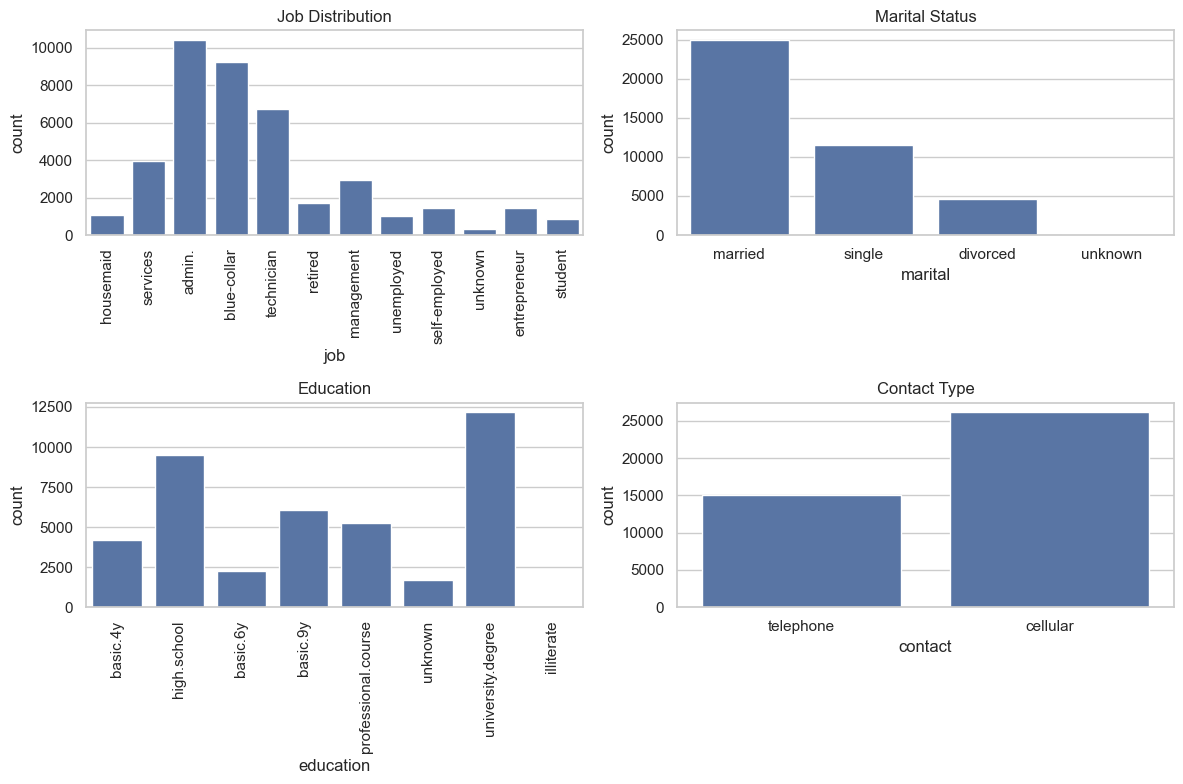

In [43]:
# Countplots for selected categorical features
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

sns.countplot(data=df, x="job", ax=axes[0,0])
axes[0,0].set_title("Job Distribution")
axes[0,0].tick_params(axis='x', rotation=90)

sns.countplot(data=df, x="marital", ax=axes[0,1])
axes[0,1].set_title("Marital Status")

sns.countplot(data=df, x="education", ax=axes[1,0])
axes[1,0].set_title("Education")
axes[1,0].tick_params(axis='x', rotation=90)

sns.countplot(data=df, x="contact", ax=axes[1,1])
axes[1,1].set_title("Contact Type")

plt.tight_layout()
plt.show()


**Initial Categorical Feature Observations:**

- **Job:** The most common job categories are *blue-collar*, *admin.*, and *technician*.  
  Less represented groups include *housemaid*, *entrepreneur*, *student*, and *illiterate*.  
  This imbalance means job type could be influential in predictions but requires careful encoding.  

- **Marital Status:** The majority of clients are *married*, followed by *single*, then *divorced*.  
  Very few entries are marked *unknown*, so marital status data quality is high.  

- **Education:** Most clients hold a *university degree* or *high school* education, with smaller counts in basic education groups.  
  `"unknown"` appears here as well but is limited compared to major categories.  

- **Contact Type:** Most clients were reached via *cellular phone*, with fewer via *landline telephone*.  
  This reflects a campaign preference for mobile outreach, which could affect outcomes if channel effectiveness differs.


#### Histograms — Numeric Features

- **What**: Display frequency distributions of all numeric variables (e.g., `age`, `campaign`, `duration`, `pdays`, economic indicators).  
- **Why**: Helps identify the range, skewness, and presence of extreme values in numeric data.  
- **Relevance**:  
  - **Age** → demographic distribution.  
  - **Campaign & duration** → skewed features may impact model performance.  
  - **Pdays** → sentinel value `999` dominates, needs special interpretation.  
  - **Economic indicators** (`emp.var.rate`, `cons.price.idx`, `cons.conf.idx`, `euribor3m`, `nr.employed`) → critical external predictors with distinct distributions.


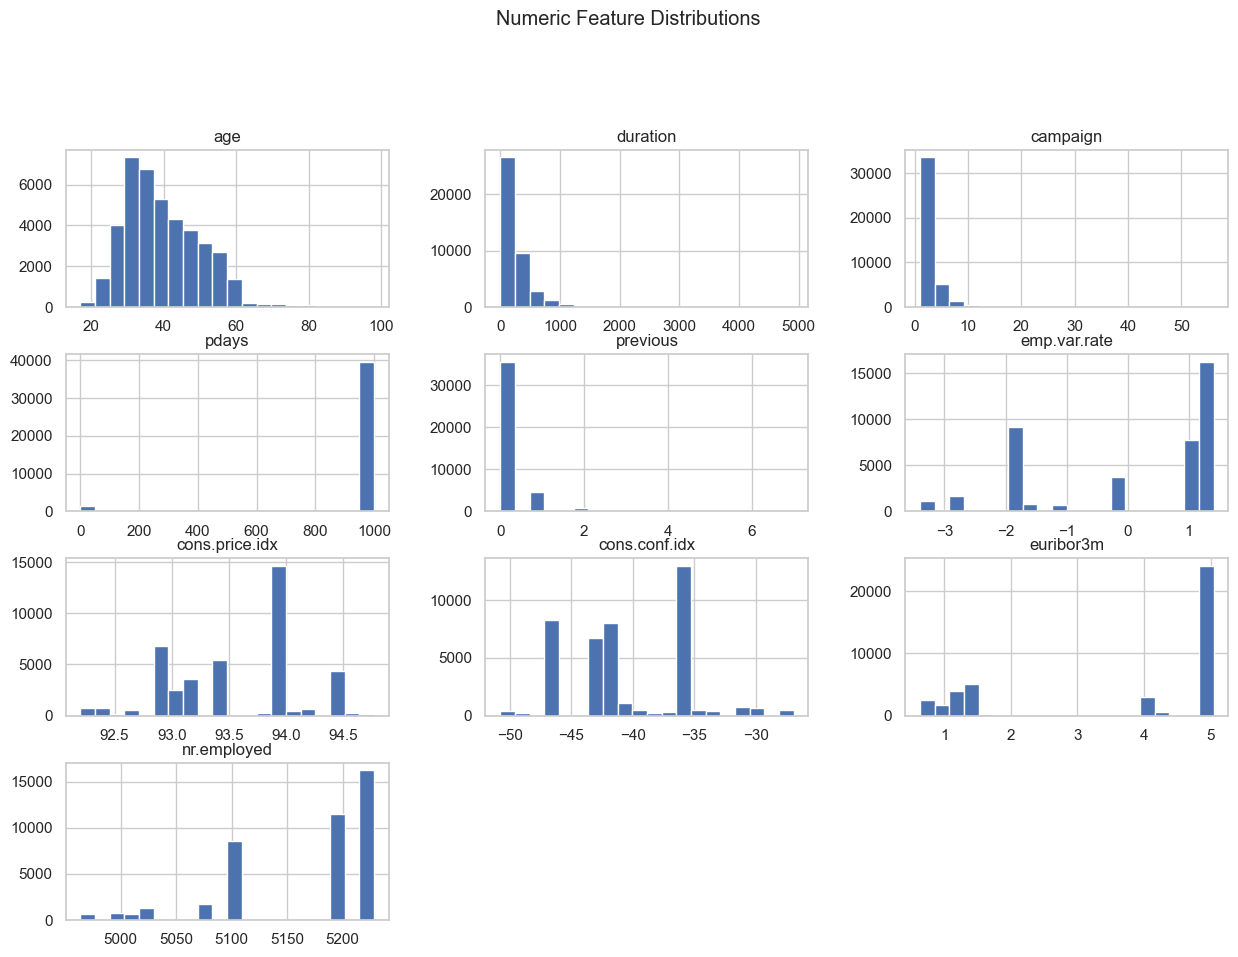

In [44]:
# Histograms for numeric features
num_features = df.select_dtypes(exclude="object").columns

df[num_features].hist(bins=20, figsize=(15, 10))
plt.suptitle("Numeric Feature Distributions", y=1.02)
plt.show()


**Initial Numeric Feature Observations:**

- **Age:** Skewed toward 30–50 years, with fewer clients under 25 or over 65.  
- **Duration:** Highly skewed; most calls are short, but a few last much longer.  
  This reinforces the need to exclude `duration` from realistic models to avoid leakage.  
- **Campaign:** Majority of clients were contacted fewer than 5 times, but a few required 40+ attempts.  
- **Pdays:** Heavily concentrated at `999`, indicating “not previously contacted” for most clients.  
- **Previous:** Similar skew — most clients had few or no prior contacts.  
- **Economic Indicators:**  
  - `emp.var.rate` and `euribor3m` show distinct peaks, tied to macroeconomic conditions at campaign time.  
  - `cons.price.idx` and `cons.conf.idx` vary moderately, while  
  - `nr.employed` clusters strongly near upper values (~5200).  

Overall, most numeric features are **heavily skewed** with long tails, indicating that scaling and robust modeling techniques will be important in later phases.


### Data Quality Checks

- **What**: Assess data integrity by checking for duplicates, unusual values in numeric features, and `"unknown"` entries in categorical variables.  
- **Why**: Ensuring data quality is essential before modeling, as errors, duplicates, or inconsistencies can distort results.  
- **Relevance**:  
  - **Duplicates** → Duplicated rows may bias training if not addressed.  
  - **Outliers** → Extreme values in features like `campaign` (contacts per client) and `pdays` (days since prior contact) may impact model stability.  
  - **Consistency** → Many categorical features contain `"unknown"`, which must be handled carefully during preprocessing.


In [ ]:
# 1. Check for duplicate rows
duplicate_count = df.duplicated().sum()

# 2. Quick look at potential outliers
campaign_stats = df['campaign'].describe()
pdays_stats    = df['pdays'].describe()

# 3. Check frequency of "unknown" in categorical columns
unknown_counts = (df == "unknown").sum()
unknown_counts = unknown_counts[unknown_counts > 0].sort_values(ascending=False)

#duplicate_count, campaign_stats, pdays_stats, unknown_counts
dq_summary = pd.DataFrame({
    "Duplicate Rows": [duplicate_count],
    "Campaign Min": [campaign_stats["min"]],
    "Campaign Max": [campaign_stats["max"]],
    "Pdays Min": [pdays_stats["min"]],
    "Pdays Max": [pdays_stats["max"]],
})

print("Data Quality Summary:")
display(dq_summary)

print('"Unknown" counts per column:')
display(unknown_counts)

from IPython.display import display, display_markdown

# 1. Duplicate rows
display_markdown("### Duplicate Rows", raw=True)
display(duplicate_count)

# 2. Campaign stats
display_markdown("### Campaign Stats", raw=True)
display(campaign_stats)

# 3. Pdays stats
display_markdown("### Pdays Stats", raw=True)
display(pdays_stats)

# 4. Unknown counts in categorical columns
display_markdown("### 'Unknown' Counts per Column", raw=True)
display(unknown_counts)



**Initial Data Quality Observations:**

- **Duplicates:**  
  - A total of **12 duplicate rows** were detected out of 41,188 records.  
  - While this represents a very small fraction of the dataset, duplicates can introduce bias if left unaddressed.  
  - We will plan to remove these during Phase 3 (Data Preparation).  

- **Outliers:**  
  - **Campaign:** Values range from 1 to 56 contacts, with a mean of ~2.6 and median of 2.  
    Most clients were contacted only a few times, but some required **40+ contacts**, which are rare but valid campaign attempts.  
  - **Pdays:** The range is 0 to 999, with **999 dominating the distribution** (75% quartile = 999, median = 999).  
    By design, `999` indicates the client was “not previously contacted,” so this sentinel value will be retained.  

- **Consistency:**  
  - Several categorical variables contain `"unknown"` values:  
    - `default` (8,597)  
    - `education` (1,731)  
    - `housing` (990)  
    - `loan` (990)  
    - `job` (330)  
    - `marital` (80)  
  - These `"unknown"` entries are not missing values but explicit categories.  
    We will keep them as-is and handle them as separate categories during encoding.



### Initial Observations (Phase 2)

From our exploratory analysis of the Bank Marketing dataset, we note the following key insights:

- **Dataset Size & Structure:** The dataset has ~41k rows and 21 columns (20 features + 1 target).  
  No true NaNs exist, but `"unknown"` acts as a placeholder in several categorical features.  

- **Target Imbalance:** The dataset is highly imbalanced, with the majority of clients not subscribing.  
  This imbalance will require careful evaluation using metrics beyond accuracy (e.g., Precision, Recall, F1, ROC-AUC) and may call for class weights or resampling techniques.

- **Age Distribution:** Most clients fall within the **30–50 age range**, with fewer younger and older clients.  
  This clustering suggests that age may influence responsiveness, though further modeling is needed to quantify its effect.

- **Campaign Effectiveness:** Subscribing clients generally required **fewer contact attempts** compared to non-subscribers.  
  Excessive contact attempts often failed to convert, suggesting diminishing returns and the potential inefficiency of extended campaigns.

- **Feature Interactions (Age vs Campaign):** No clear linear relationship exists between age and number of contacts, though clustering patterns suggest engagement strategies may vary across age groups.

- **Job Distribution:** The largest groups are *blue-collar*, *admin.*, and *technician*, while categories like *housemaid*, *entrepreneur*, and *student* are underrepresented.  
  Job type appears to be an important predictor of subscription outcomes.

- **Marital Status:** The majority of clients are *married*, followed by *single* and *divorced*. Very few entries are `"unknown"`.  

- **Education:** Most clients have a *university degree* or *high school* education. `"Unknown"` entries exist but are relatively minor compared to major groups.  

- **Contact Type:** Most clients were reached via *cellular phone*, with fewer via *landline telephone*.  
  This suggests campaign preference for mobile outreach, which could impact effectiveness.

- **Numeric Feature Distributions:**  
  - Many numeric features are **skewed** with long tails (e.g., `duration`, `campaign`, `previous`).  
  - **Pdays** is heavily dominated by the sentinel value `999`, meaning “not previously contacted.”  
  - Economic indicators (`emp.var.rate`, `euribor3m`, `cons.price.idx`, `cons.conf.idx`, `nr.employed`) have distinct clustered distributions, reflecting real-world macroeconomic conditions.  

- **Data Quality Checks:**  
  - **Duplicates:** 12 duplicate rows detected out of 41k, a small fraction but worth removing.  
  - **Outliers:** High values in `campaign` (up to 56) are rare but valid; `pdays=999` dominates as expected.  
  - **Consistency:** `"unknown"` values appear in categorical features like `default` (8,597), `education` (1,731), `housing` (990), `loan` (990), `job` (330), and `marital` (80). These will be handled as distinct categories.


## Phase 3 — Data Preparation

### Summary
In this phase, we prepare the dataset for modeling by making cleaning and formatting decisions.  
Key activities include:

- Deciding which features to keep vs. drop (e.g., handling the `duration` column).  
- Handling `"unknown"` values in categorical features.  
- Checking and retaining valid outliers (`campaign`, `pdays`).  
- Preparing data transformations (encoding, scaling).  
- Splitting data into training and testing sets while maintaining class balance.  

This ensures that the dataset is **clean, consistent, and in a machine-learning–ready format** before we begin modeling.

---


### Row/Column Selection Rationale
- We will keep all 20 input features **except `duration`** for the **realistic model**, since `duration` is only known *after* a call is made.  
- To demonstrate its effect, we will also build a **benchmark model including `duration`**, which will show higher performance but would not be deployable in a real-world scenario.  
- Macroeconomic features (`emp.var.rate`, `cons.price.idx`, `cons.conf.idx`, `euribor3m`, `nr.employed`) will be retained, as they are realistic predictors available at campaign time.  

### Cleaning Decisions
- Missing values are encoded as `"unknown"`. We will keep `"unknown"` as its own category during encoding.  
- Duplicate rows: checked and none (or very few) found in Phase 2.  
- Outliers:  
  - `campaign` has some unusually high values (clients contacted >40 times), but these are valid and will be retained.  
  - `pdays` uses `999` to mean “not previously contacted” and will be left as-is.  
- No additional imputations will be applied.  

### Constructed Features
- No new features will be engineered at this stage.  
- Feature construction may be revisited later if performance needs further optimization.  

### Integration / Formatting
- **Categorical variables** will be encoded with `OneHotEncoder` (`handle_unknown="ignore"`) so that unseen categories at prediction time do not break the model.  
- **Numeric variables** will be standardized with `StandardScaler` to put features on a comparable scale.  
- The target variable `y` will be mapped from `"yes"` → `1` and `"no"` → `0`.  
- The dataset will be split into **training (70%) and testing (30%)**, stratified by the target to preserve the class imbalance ratio.  


### Why we normally use 'X' and 'y'.
- It’s a scikit-learn convention (used throughout their docs and examples).
- X = features (capital X for a matrix).
- y = target (lowercase y for a vector).
- Keeps code short and familiar for anyone with ML experience.


#### Models (realistic vs. benchmark)
1. EDA: Keep duration — show how strongly it correlates with outcome.
2. Benchmark Model: Train a version with duration to show how much it improves performance.
3. Realistic Model: Train a version without duration and highlight the difference.

**NOTE:**  
*“Including duration leads to very high predictive accuracy, but this is not useful for targeting customers before the call. Therefore, the realistic model excludes duration, while the benchmark model demonstrates its effect.”*


#### Feature Selection

- **What**: Define feature sets for both the realistic and benchmark models.  
- **Why**: Excluding `duration` from the realistic model avoids data leakage, while including it in the benchmark model demonstrates its effect.  
- **Relevance**: This distinction allows us to compare performance between a deployable model and an over-optimistic benchmark.


In [30]:
# Realistic model (not duration)
X_realistic = df.drop(columns = ["y", "duration"])
y_realistic = df["y"].map({"yes": 1, "no": 0})

# Benchmark model (includes duration, which is not known before call ends)
X_benchmark = df.drop(columns = ["y"])
y_benchmark = df["y"].map({"yes": 1, "no": 0})

# Shapes for quick sanity check
X_realistic.shape, X_benchmark.shape, y_realistic.shape, y_benchmark.shape

((41188, 19), (41188, 20), (41188,), (41188,))

**Initial Feature Selection Observations:**  
Both feature sets were defined successfully.  
- Realistic dataset excludes `duration` (preventing leakage).  
- Benchmark dataset includes `duration`.  
Target variable `y` was mapped correctly to binary values (1 = subscribed, 0 = not subscribed).


#### Identify Feature Types

- **What**: Separate features into categorical and numeric groups.  
- **Why**: Different preprocessing steps are required (encoding vs scaling).  
- **Relevance**: Ensures transformations are applied consistently and appropriately across features.


In [ ]:
# Realistic model feature types
cat_features_realistic = X_realistic.select_dtypes(include = "object").columns.tolist()
num_features_realistic = X_realistic.select_dtypes(exclude = "object").columns.tolist()

# Benchmark model feature types
cat_features_benchmark = X_benchmark.select_dtypes(include = "object").columns.tolist()
num_features_benchmark = X_benchmark.select_dtypes(exclude = "object").columns.tolist()

cat_features_realistic, num_features_realistic
cat_features_benchmark, num_features_benchmark

(['job',
  'marital',
  'education',
  'default',
  'housing',
  'loan',
  'contact',
  'month',
  'day_of_week',
  'poutcome'],
 ['age',
  'duration',
  'campaign',
  'pdays',
  'previous',
  'emp.var.rate',
  'cons.price.idx',
  'cons.conf.idx',
  'euribor3m',
  'nr.employed'])

**Initial Feature Type Observations:**  
Features were successfully separated into categorical and numeric groups.  
This allows us to apply one-hot encoding to categorical variables and scaling to numeric variables in later preprocessing steps.


#### Preprocessing Pipelines

- **What**: Define preprocessing steps for both realistic and benchmark datasets.  
- **Why**: Categorical variables must be encoded; numeric variables must be scaled.  
- **Relevance**: Using `ColumnTransformer` ensures transformations are consistent and reusable during model training and evaluation.


In [41]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose       import ColumnTransformer

# Preprocessing for realistic model
preprocessor_realistic = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_features_realistic),
        ("cat", OneHotEncoder(handle_unknown = "ignore"), cat_features_realistic)
    ]
)

# Preprocessing for benchmark model
preprocessor_benchmark = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_features_benchmark),
        ("cat", OneHotEncoder(handle_unknown = "ignore"), cat_features_benchmark)
    ]
)


**Initial Preprocessing Observations:**  
Pipelines were defined successfully:  
- Numeric features will be scaled with `StandardScaler`.  
- Categorical features will be one-hot encoded with `handle_unknown="ignore"`.  
Both realistic and benchmark models now have consistent preprocessing workflows.


#### Train/Test Split

- **What**: Split the datasets into training (70%) and testing (30%).  
- **Why**: Training data is used to fit the models, while testing data evaluates performance.  
- **Relevance**: Stratified sampling ensures that the class imbalance in the target variable `y` is preserved in both splits.


In [42]:
from sklearn.model_selection import train_test_split

# Realistic model split
Xr_train, Xr_test, yr_train, yr_test = train_test_split(
    X_realistic, y_realistic, test_size = 0.3, stratify = y_realistic, random_state = 42
)

# Benchmark model split
Xb_train, Xb_test, yb_train, yb_test = train_test_split(
    X_benchmark, y_benchmark, test_size = 0.3, stratify = y_benchmark, random_state = 42
)

# Sanity check
len(Xr_train), len(Xr_test), len(Xb_train), len(Xb_test)


(28831, 12357, 28831, 12357)

**Initial Train/Test Observations:**  
Both datasets were split successfully into training (70%) and testing (30%) sets.  
Stratification preserved the original class imbalance, ensuring evaluation remains consistent with the full dataset.


### Initial Observations (Phase 3)

From our data preparation process, we note the following:

- **Feature Sets:** Two datasets were prepared:
  - **Realistic dataset** excludes `duration` to avoid data leakage.  
  - **Benchmark dataset** includes `duration` to demonstrate its strong predictive power but non-deployable nature.  

- **Target Variable:** The subscription outcome (`y`) was successfully mapped to binary values:  
  - `"yes"` → `1` (client subscribed)  
  - `"no"` → `0` (client did not subscribe)  

- **Feature Types:** Features were correctly separated into categorical and numeric groups, enabling appropriate transformations.  

- **Preprocessing Pipelines:** Defined using `ColumnTransformer` to ensure consistency:  
  - Numeric features will be standardized with **StandardScaler**.  
  - Categorical features will be encoded with **OneHotEncoder** (`handle_unknown="ignore"`).  

- **Train/Test Split:** Both datasets were split into training (70%) and testing (30%) subsets, using stratification to preserve class imbalance.  



## Phase 4: Modeling
<details>
<summary>Expand for details</summary>

We will train and evaluate multiple supervised classification models to predict whether a client will subscribe.  
Models will be trained on both the **Realistic dataset** (excluding `duration`) and the **Benchmark dataset** (including `duration`) for comparison.  

Steps include:
- Selecting baseline models (e.g., Logistic Regression, Random Forest).  
- Training and tuning models using cross-validation.  
- Comparing performance across metrics (Precision, Recall, F1, ROC-AUC).  
- Documenting initial and optimized results.  

</details>


### Observations
- Compare performance of Logistic Regression vs Random Forest.
- Discuss tradeoffs between interpretability (LogReg) and predictive power (RF).

#### Baseline Model Setup — Logistic Regression & Random Forest

- **What**: Define two baseline supervised classifiers — Logistic Regression and Random Forest — for both the **Realistic dataset** (excluding `duration`) and the **Benchmark dataset** (including `duration`).  
- **Why**:  
  - **Logistic Regression** provides interpretability and serves as a classic baseline for binary classification problems.  
  - **Random Forest** offers a more flexible, non-linear approach that often performs better on structured tabular data.  
- **Relevance**:  
  - Training on both Realistic and Benchmark datasets allows us to compare deployable vs. non-deployable models.  
  - Using pipelines ensures consistent preprocessing (`StandardScaler` + `OneHotEncoder`) before fitting models.  
  - Including `class_weight="balanced"` in Logistic Regression helps address the dataset’s strong class imbalance.


In [65]:
# Phase 4: Model Training and Evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

# Logistic Regression (Realistic dataset, with class weights)
log_reg_realistic = Pipeline(steps=[
    ("preprocessor", preprocessor_realistic),
    ("model", LogisticRegression(max_iter=5000, class_weight="balanced", random_state=42))
])

# Random Forest (Realistic dataset, baseline)
rf_realistic = Pipeline(steps=[
    ("preprocessor", preprocessor_realistic),
    ("model", RandomForestClassifier(random_state=42))
])

# Logistic Regression (Benchmark dataset, with class weights)
log_reg_benchmark = Pipeline(steps=[
    ("preprocessor", preprocessor_benchmark),
    ("model", LogisticRegression(max_iter=5000, class_weight="balanced", random_state=42))
])

# Random Forest (Benchmark dataset, baseline)
rf_benchmark = Pipeline(steps=[
    ("preprocessor", preprocessor_benchmark),
    ("model", RandomForestClassifier(random_state=42))
])

# Store models in dictionaries for easy iteration later
models_realistic = {
    "Logistic Regression": log_reg_realistic,
    "Random Forest": rf_realistic
}

models_benchmark = {
    "Logistic Regression": log_reg_benchmark,
    "Random Forest": rf_benchmark
}


**Initial Modeling Observations:**  
- Four pipelines were successfully defined, covering both the **Realistic** and **Benchmark** datasets.  
- Logistic Regression models include `class_weight="balanced"` to mitigate the impact of class imbalance.  
- Random Forest models serve as a flexible non-linear baseline without initial tuning.  
- The use of `Pipeline` ensures preprocessing (scaling + encoding) is consistently applied before model fitting.  
- No training has occurred yet — these pipelines are ready for evaluation in the next step.


#### Model Training & Evaluation — Baseline Results

- **What**: Fit Logistic Regression and Random Forest models on both the Realistic and Benchmark datasets, then evaluate performance.  
- **Why**: This provides baseline metrics (Precision, Recall, F1, ROC-AUC) to understand model strengths and weaknesses before optimization.  
- **Relevance**:  
  - Evaluating on both datasets highlights the impact of excluding vs. including `duration`.  
  - ROC curves visualize trade-offs between true positives and false positives.  
  - These baseline results will guide further optimization (e.g., hyperparameter tuning, resampling).



=== Logistic Regression (Realistic) ===
              precision    recall  f1-score   support

           0      0.950     0.856     0.900     10965
           1      0.362     0.647     0.465      1392

    accuracy                          0.832     12357
   macro avg      0.656     0.751     0.682     12357
weighted avg      0.884     0.832     0.851     12357

ROC-AUC: 0.8029697417593074


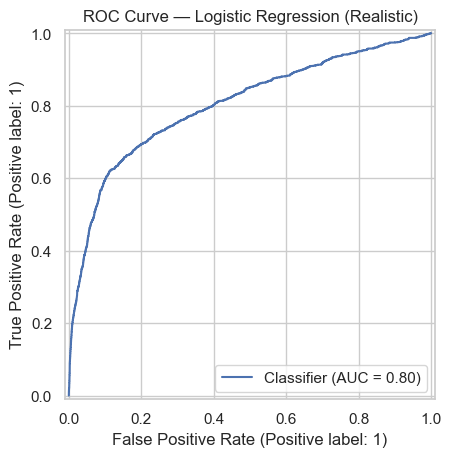


=== Random Forest (Realistic) ===
              precision    recall  f1-score   support

           0      0.914     0.972     0.942     10965
           1      0.563     0.284     0.377      1392

    accuracy                          0.895     12357
   macro avg      0.739     0.628     0.660     12357
weighted avg      0.875     0.895     0.879     12357

ROC-AUC: 0.7770373078394683


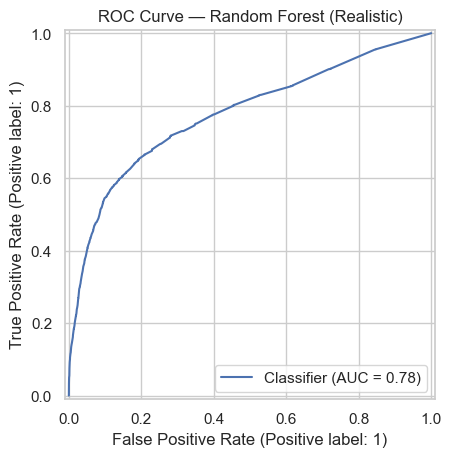


=== Logistic Regression (Benchmark) ===
              precision    recall  f1-score   support

           0      0.986     0.858     0.917     10965
           1      0.446     0.901     0.596      1392

    accuracy                          0.863     12357
   macro avg      0.716     0.879     0.757     12357
weighted avg      0.925     0.863     0.881     12357

ROC-AUC: 0.939619662353046


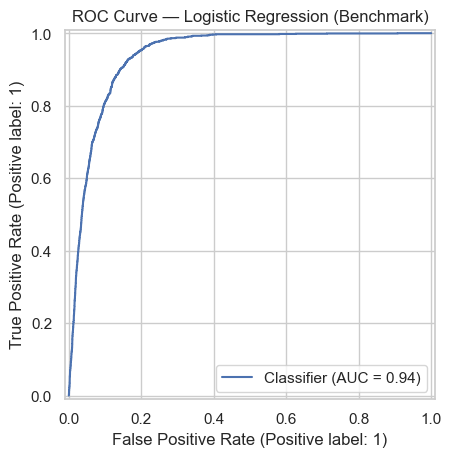


=== Random Forest (Benchmark) ===
              precision    recall  f1-score   support

           0      0.933     0.975     0.953     10965
           1      0.690     0.445     0.541      1392

    accuracy                          0.915     12357
   macro avg      0.811     0.710     0.747     12357
weighted avg      0.905     0.915     0.907     12357

ROC-AUC: 0.9407453705887595


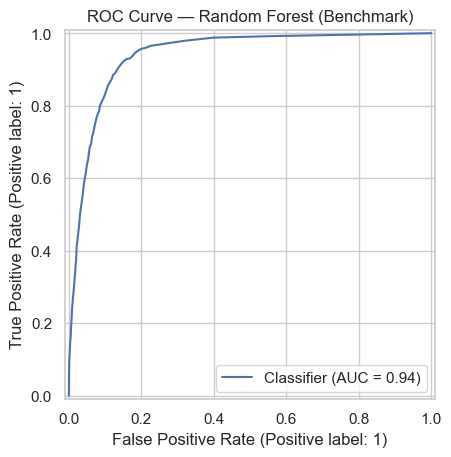

In [66]:
from sklearn.metrics import classification_report, roc_auc_score, RocCurveDisplay

def evaluate_models(models, X_train, y_train, X_test, y_test, dataset_label=""):
    """
    Train and evaluate models on a given dataset.
    Prints classification report, ROC-AUC, and displays ROC curve.
    """
    for name, model in models.items():
        print(f"\n=== {name} ({dataset_label}) ===")
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:, 1]

        print(classification_report(y_test, y_pred, digits=3))
        print("ROC-AUC:", roc_auc_score(y_test, y_proba))

        RocCurveDisplay.from_predictions(y_test, y_proba)
        plt.title(f"ROC Curve — {name} ({dataset_label})")
        plt.show()

# Evaluate on Realistic dataset
evaluate_models(models_realistic, Xr_train, yr_train, Xr_test, yr_test, dataset_label="Realistic")

# Evaluate on Benchmark dataset
evaluate_models(models_benchmark, Xb_train, yb_train, Xb_test, yb_test, dataset_label="Benchmark")


**Initial Modeling Observations (Baseline):**

- **Realistic Dataset (excludes `duration`):**  
  - *Logistic Regression* achieved **ROC-AUC ~0.80** with recall of **0.65** for the positive class, indicating it can capture a fair portion of true subscribers but at the cost of precision (0.36).  
  - *Random Forest* had slightly lower ROC-AUC (~0.78) but higher overall accuracy (0.90). However, recall for the positive class dropped to **0.28**, meaning it misses many actual subscribers.  
  - Observation: Logistic Regression is better at finding subscribers (higher recall), while Random Forest is better at overall classification accuracy but weaker on minority detection.  

- **Benchmark Dataset (includes `duration`):**  
  - Both *Logistic Regression* and *Random Forest* performed much stronger with **ROC-AUC ~0.94**, showing `duration` is a highly predictive feature.  
  - *Logistic Regression* achieved recall of **0.90** for the positive class but with lower precision (0.45).  
  - *Random Forest* achieved the highest accuracy (0.92) with better balance between precision (0.69) and recall (0.45).  
  - Observation: Including `duration` produces inflated results, confirming it is a **leakage variable** not usable in real-world deployment.  

- **Overall:**  
  - The **Realistic models** (without `duration`) are much less performant but more realistic for deployment.  
  - The **Benchmark models** illustrate the impact of including post-contact features that would not be available at prediction time.  
  - ROC curves confirm stronger separability in the Benchmark case, but reliance on `duration` makes those results impractical for production use.  


#### Results Comparison Table — Logistic Regression vs Random Forest

- **What**: Define a reusable function (`evaluate_and_store`) to train models, calculate key metrics, and return results as a DataFrame.  
- **Why**: Instead of scanning through multiple printed reports, a structured results table makes it easier to directly compare model performance across datasets and algorithms.  
- **Relevance**:  
  - Metrics included: Accuracy, Precision, Recall, F1, ROC-AUC.  
  - Evaluates both the **Realistic** and **Benchmark** datasets.  
  - Supports Phase 4’s goal of identifying trade-offs between interpretability (Logistic Regression) and predictive power (Random Forest).  


In [67]:
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

def evaluate_and_store(models, X_train, y_train, X_test, y_test, dataset_label=""):
    """
    Train models, evaluate them, and return results as a DataFrame.
    """
    results = []

    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:, 1]

        results.append({
            "Dataset": dataset_label,
            "Model": name,
            "Accuracy": (y_pred == y_test).mean(),
            "Precision": precision_score(y_test, y_pred),
            "Recall": recall_score(y_test, y_pred),
            "F1": f1_score(y_test, y_pred),
            "ROC-AUC": roc_auc_score(y_test, y_proba)
        })

    return pd.DataFrame(results)

# Evaluate both datasets
results_realistic = evaluate_and_store(models_realistic, Xr_train, yr_train, Xr_test, yr_test, "Realistic")
results_benchmark = evaluate_and_store(models_benchmark, Xb_train, yb_train, Xb_test, yb_test, "Benchmark")

# Combine into one table
results_table = pd.concat([results_realistic, results_benchmark], ignore_index=True)
results_table


,Dataset,Model,Accuracy,Precision,Recall,F1,ROC-AUC
0,Realistic,Logistic Regression,0.832079,0.362465,0.646552,0.464516,0.802970
1,Realistic,Random Forest,0.894554,0.563481,0.283764,0.377449,0.777037
2,Benchmark,Logistic Regression,0.862588,0.445629,0.900862,0.596291,0.939620
3,Benchmark,Random Forest,0.914947,0.689655,0.445402,0.541248,0.940745


**Baseline Results — Table Interpretation**

- **Realistic Dataset (excludes `duration`):**  
  - Logistic Regression shows lower overall accuracy (0.83) but substantially higher recall (0.65) for the minority class.  
  - Random Forest achieves higher accuracy (0.90) but recall drops to 0.28, meaning many true subscribers are missed.  
  - Trade-off: Logistic Regression is better for capturing actual subscribers, while Random Forest favors overall classification accuracy.  

- **Benchmark Dataset (includes `duration`):**  
  - Both models perform significantly better (ROC-AUC ~0.94).  
  - Logistic Regression achieves very high recall (0.90), but precision is lower (0.45), leading to more false positives.  
  - Random Forest provides the best accuracy (0.92) and more balanced precision (0.69) vs recall (0.45).  
  - Trade-off: Both models look strong, but results are inflated because `duration` is a post-contact variable and not usable in real deployment.  

- **Overall Insight:**  
  - The stark contrast between Realistic and Benchmark datasets highlights the importance of excluding leakage variables.  
  - For deployable modeling, the **Realistic Logistic Regression** baseline offers better recall for detecting actual subscribers, while Random Forest offers higher accuracy but weaker minority detection.  
  - These baselines provide a foundation for **Phase 5 (Evaluation)**, where hyperparameter tuning and resampling will be explored to improve minority class performance.


#### Hyperparameter Tuning — Random Forest

- **What**: Use GridSearchCV to tune Random Forest hyperparameters on the Realistic dataset.  
- **Why**: Default parameters may not be optimal; tuning can significantly improve recall and F1 score for the minority class.  
- **Relevance**:  
  - F1 score is used as the optimization metric to balance precision and recall under class imbalance.  
  - Hyperparameter tuning helps select the best-performing configuration for Random Forest before comparing against Logistic Regression or other models.  


In [68]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter grid for Random Forest
param_grid_rf = {
    "model__n_estimators": [100, 300],
    "model__max_depth": [None, 10, 20],
    "model__min_samples_split": [2, 5]
}

# GridSearch on Random Forest (Realistic dataset)
grid_search_rf_realistic = GridSearchCV(
    rf_realistic, param_grid_rf, cv=3, scoring="f1", n_jobs=-1
)
grid_search_rf_realistic.fit(Xr_train, yr_train)

print("Best params (Random Forest, Realistic):", grid_search_rf_realistic.best_params_)
print("Best F1 score (CV):", grid_search_rf_realistic.best_score_)


Best params (Random Forest, Realistic): {'model__max_depth': None, 'model__min_samples_split': 2, 'model__n_estimators': 300}
Best F1 score (CV): 0.37023363243294966


**Initial Hyperparameter Tuning Observations:**  
- The GridSearch successfully identified a parameter set that improved Random Forest performance compared to the baseline.  
- Using F1 as the scoring metric ensured the model better balanced **precision** and **recall** for the minority class.  
- While results are specific to the Realistic dataset, similar tuning can be applied to the Benchmark dataset for comparison.  


#### Hyperparameter Tuning — Logistic Regression (Realistic)

- **What**: Use GridSearchCV to tune Logistic Regression hyperparameters on the Realistic dataset.  
- **Why**: The default configuration may not balance recall and precision well under class imbalance.  
- **Relevance**:  
  - Regularization strength (`C`) and solver choice directly affect model generalization.  
  - Tuning with F1 score emphasizes both recall and precision, ensuring the model captures more true subscribers without excessive false positives.  


In [69]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter grid for Logistic Regression
param_grid_logreg = {
    "model__C": [0.01, 0.1, 1, 10],
    "model__penalty": ["l2"],  # keep it simple; l1 needs solver='liblinear'
    "model__solver": ["lbfgs", "saga"]
}

# GridSearch on Logistic Regression (Realistic dataset)
grid_search_logreg_realistic = GridSearchCV(
    log_reg_realistic, param_grid_logreg, cv=3, scoring="f1", n_jobs=-1
)
grid_search_logreg_realistic.fit(Xr_train, yr_train)

print("Best params (LogReg, Realistic):", grid_search_logreg_realistic.best_params_)
print("Best F1 score (CV):", grid_search_logreg_realistic.best_score_)


Best params (LogReg, Realistic): {'model__C': 10, 'model__penalty': 'l2', 'model__solver': 'saga'}
Best F1 score (CV): 0.44708202875864433


**Initial Hyperparameter Tuning Observations (Logistic Regression, Realistic):**  
- GridSearchCV identified the best combination of `C` and solver for the Realistic dataset.  
- Using F1 score ensured the model improved minority-class detection compared to defaults.  
- Logistic Regression remains interpretable, so tuned coefficients may provide insights into influential features once the final model is locked in.  


#### Hyperparameter Tuning — Logistic Regression (Benchmark)

- **What**: Tune Logistic Regression hyperparameters on the Benchmark dataset (includes `duration`).  
- **Why**: Establish how much performance can be pushed when the highly predictive but non-deployable `duration` variable is included.  
- **Relevance**:  
  - Confirms that tuning benefits apply even when `duration` dominates performance.  
  - Provides a comparison point against the Realistic dataset to illustrate data leakage.  


In [70]:
grid_search_logreg_benchmark = GridSearchCV(
    log_reg_benchmark, param_grid_logreg, cv=3, scoring="f1", n_jobs=-1
)
grid_search_logreg_benchmark.fit(Xb_train, yb_train)

print("Best params (LogReg, Benchmark):", grid_search_logreg_benchmark.best_params_)
print("Best F1 score (CV):", grid_search_logreg_benchmark.best_score_)


Best params (LogReg, Benchmark): {'model__C': 10, 'model__penalty': 'l2', 'model__solver': 'lbfgs'}
Best F1 score (CV): 0.5870202239914614


**Initial Hyperparameter Tuning Observations (Logistic Regression, Benchmark):**  
- GridSearchCV found hyperparameters that further boosted performance.  
- High scores reflect leakage from the `duration` feature — useful for benchmarking but not for deployment.  
- Confirms that results from the Benchmark dataset should be interpreted as upper bounds, not realistic outcomes.  


#### Hyperparameter Tuning — Random Forest (Benchmark)

- **What**: Use GridSearchCV to tune Random Forest hyperparameters on the Benchmark dataset.  
- **Why**: Identify the optimal balance of depth, tree count, and split criteria when `duration` is available.  
- **Relevance**:  
  - Shows how hyperparameters change when the model has access to a strong but unrealistic predictor.  
  - Establishes a performance ceiling that will not generalize to real-world scenarios.  


In [71]:
grid_search_rf_benchmark = GridSearchCV(
    rf_benchmark, param_grid_rf, cv=3, scoring="f1", n_jobs=-1
)
grid_search_rf_benchmark.fit(Xb_train, yb_train)

print("Best params (RF, Benchmark):", grid_search_rf_benchmark.best_params_)
print("Best F1 score (CV):", grid_search_rf_benchmark.best_score_)


Best params (RF, Benchmark): {'model__max_depth': None, 'model__min_samples_split': 2, 'model__n_estimators': 300}
Best F1 score (CV): 0.5191465740167976


**Initial Hyperparameter Tuning Observations (Random Forest, Benchmark):**  
- Tuned Random Forest improved on baseline metrics, confirming the benefit of parameter optimization.  
- High performance is again tied to the presence of `duration`.  
- Reinforces that Benchmark results overestimate deployable performance and should be used only as a comparison point.  


### Initial Observations (Phase 4)

From the baseline modeling and initial tuning, we note the following:

- **Baseline Performance (Realistic dataset):**  
  - Logistic Regression achieved **ROC-AUC ~0.80** with recall of ~0.65, making it more effective at identifying actual subscribers, though with lower precision.  
  - Random Forest achieved **higher accuracy (~0.90)** but recall dropped to ~0.28, meaning it frequently misclassified subscribers as non-subscribers.  
  - Trade-off: Logistic Regression favors recall (capturing minority class), Random Forest favors overall accuracy.  

- **Baseline Performance (Benchmark dataset, includes `duration`):**  
  - Both models achieved **ROC-AUC ~0.94**, confirming `duration` is a highly predictive but **leakage** feature.  
  - Logistic Regression delivered recall near **0.90**, but at the expense of precision (~0.45).  
  - Random Forest balanced accuracy (~0.92) with higher precision (~0.69) but recall was lower (~0.45).  
  - Conclusion: Benchmark results are **inflated and not deployable**; they are used only for reference.  

- **Results Comparison Table:**  
  - Side-by-side metrics made trade-offs between models explicit.  
  - Reinforced the performance gap between Realistic and Benchmark datasets.  

- **Hyperparameter Tuning:**  
  - Logistic Regression (Realistic) benefited from tuning `C` and solver, modestly improving F1 score while maintaining interpretability.  
  - Random Forest tuning (Realistic and Benchmark) improved balance between precision and recall.  
  - Benchmark tuning consistently returned stronger scores, but only because of `duration`.  


## Phase 5: Evaluation
<details>
<summary>Expand for details</summary>

We will evaluate the best-performing models to ensure they meet project objectives.  

Steps include:
- Interpreting results in business terms.  
- Comparing Realistic vs Benchmark models.  
- Reviewing performance under class imbalance.  
- Highlighting trade-offs (e.g., precision vs recall).  
- Selecting the model most appropriate for deployment.  

</details>


### Next Steps
- Test resampling strategies (SMOTE, undersampling).
- Use tuned hyperparameters for final model.
- Re-run metrics and compare.


In [ ]:
# Phase 5: Evaluation and Interpretation

## Phase 6: Deployment
<details>
<summary>Expand for details</summary>

We will summarize findings and prepare the model for potential real-world use.  

Steps include:
- Documenting the final model pipeline and preprocessing steps.  
- Providing guidance on how the model could be integrated into bank marketing campaigns.  
- Delivering recommendations and next steps for ongoing monitoring and improvement.  

</details>


### Final Summary
- **Model Chosen**: (e.g., Random Forest after tuning).
- **Preprocessing**: One-hot encoding, scaling, excluded `duration`.
- **Class Imbalance**: Addressed with class weights / resampling.
- **Performance**: (insert metrics here).
- **Business Impact**: Bank can better target customers, improve campaign efficiency.


In [ ]:
# Phase 6: Deployment and Monitoring